# Data snooping
Data snooping is a form of statistical bias manipulating data or analysis to artificially get statistically significant results.

Extended data manipulation increases your chances of observing statistically significant results because of the probabilistic nature of all statistical tests. Although some of these results may be significant by nature, other results could demonstrate this property just by chance.

Alternative names: data dredging, data fishing, p-hacking.

## Jelly beans experiment
In this simple simulation we will demonstrate an example of data snooping.

## Part 1: does eating jelly beans cause acne?
Suppose you study the effect of jelly beans on acne. To do so, you conduct a survey among  500
  volunteers and collect the following information:

if a participant eats jelly beans on a regular basis;
participant's acne condition measured as a value between  0
  and  1.

Let us simulate the data. We generate two independent random variables:

acne_condition indicating the acne condition of a participant drawn from uniform distribution  U(0,1)
 ;
eating indicating jelly bean consumption will drawn from Bernoulli distribution  Bern(0.9)
 ;
Here we assume that  90%
  of the population eats jelly beans on a regular basis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(2)

people = 500
p_eat_jelly_bean = 0.9

# draw a sample
acne_condition = np.random.rand(people)
eating = np.random.choice(['eating', 'not eating'], people, replace=True, p=[p_eat_jelly_bean, 1 - p_eat_jelly_bean])

# create data frame
data = pd.DataFrame({'acne_condition': acne_condition, 'eating': eating})
data.head()

,acne_condition,eating
0,0.435995,eating
1,0.025926,eating
2,0.549662,eating
3,0.435322,eating
4,0.420368,not eating


C:\Users\omrsh\AppData\Local\Temp\ipykernel_15576\2742637519.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='eating', y='acne_condition', data=data, palette={'eating': 'yellow', 'not eating': 'blue'})
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


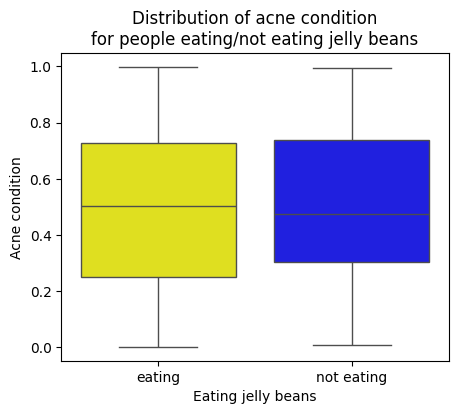

In [3]:
# Set the plot size
plt.figure(figsize=(5, 4))

# Boxplot for eating vs acne_condition
sns.boxplot(x='eating', y='acne_condition', data=data, palette={'eating': 'yellow', 'not eating': 'blue'})

# Remove legend and adjust plot title
plt.legend().set_visible(False)
plt.title('Distribution of acne condition\nfor people eating/not eating jelly beans', loc='center')

# Set axis labels
plt.xlabel('Eating jelly beans')
plt.ylabel('Acne condition')

# Show the plot
plt.show()


Now we state the null hypothesis: "There is no effect of eating jelly beans on acne condition." To check this hypothesis we run t-test.

In [4]:
from scipy.stats import ttest_ind

# Extract the acne_condition values for each group
eating_values = data[data['eating'] == 'eating']['acne_condition']
not_eating_values = data[data['eating'] == 'not eating']['acne_condition']

# Perform t-test
t_statistic, p_value = ttest_ind(eating_values, not_eating_values)

# Display the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.06292266277992374
p-value: 0.9498533350098048


The resulting p-value is high, i.e.  p=0.95>0.05, so we cannot reject the null. In other words, we conclude that there is not enough evidence to say that eating jelly beans causes acne. (Actually, we are not surprized as eating and acne_condition were generated independently of each other).

# Part 2: which jelly bean color causes acne?

You got It non-significant p-value and feel disappointed as you cannot publish your results. Your colleague suggests you to further investigate the data and check different colors of jelly beans. Maybe one of them is more dangerous than the others?

Now we add the color information to the data. We assume that there exist  20
  different jelly bean colors and that people eat jelly beans of each color with equal probability.

The code below generates one more random variable jelly_bean_color.

In [5]:
np.random.seed(2)

# Create a list of colors
colors = ['red', 'grey', 'blue', 'yellow', 'orange', 'purple', 'limegreen',
          'cyan', 'brown', 'pink', 'gold', 'salmon', 'magenta',
          'peachpuff', 'tan', 'aquamarine', 'green', 'coral', 'steelblue', 'beige']

# Add color column to the data
data['jelly_bean_color'] = np.random.choice(colors, people, replace=True)
data.loc[data['eating'] == 'not eating', 'jelly_bean_color'] = np.nan

# Display the head of the modified DataFrame
data.head()

,acne_condition,eating,jelly_bean_color
0,0.435995,eating,brown
1,0.025926,eating,aquamarine
2,0.549662,eating,peachpuff
3,0.435322,eating,brown
4,0.420368,not eating,NaN


We plot the distribution of acne condition for different jelly bean colors.

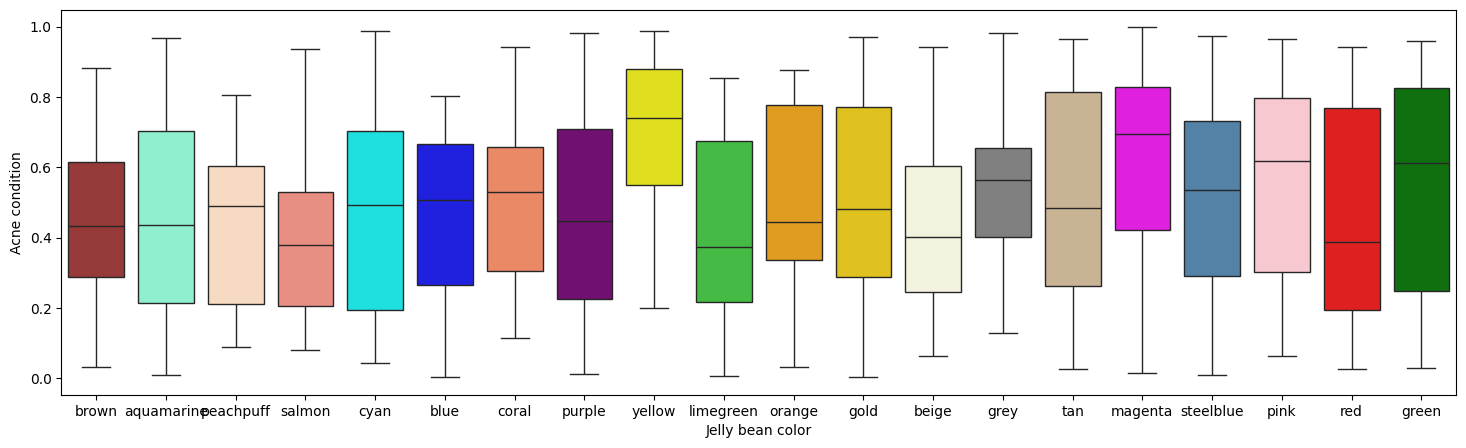

In [6]:
# Set the plot size
plt.figure(figsize=(18, 5))

# Filter out rows with NA in jelly_bean_color
filtered_data = data.dropna(subset=['jelly_bean_color'])

# Boxplot for jelly_bean_color vs acne_condition
sns.boxplot(x='jelly_bean_color', y='acne_condition', data=filtered_data, hue='jelly_bean_color', palette=colors, hue_order=colors)

# Remove legend
# plt.legend().set_visible(False)

# Set axis labels
plt.xlabel('Jelly bean color')
plt.ylabel('Acne condition')

# Show the plot
plt.show()

To check the influence of a specific jelly bean color on acne condition you again run t-test.

In [7]:
import pandas as pd
from scipy.stats import ttest_ind

def test_color(data, color):
    data['eating_color'] = data.apply(lambda row: 'yes' if row['jelly_bean_color'] == color and not pd.isna(row['jelly_bean_color']) else 'no', axis=1)
    p_value = ttest_ind(data[data['eating_color'] == 'yes']['acne_condition'], data[data['eating_color'] == 'no']['acne_condition']).pvalue
    return p_value


In [8]:
p_value_red = test_color(data, 'red')
print(f"P-value for 'red': {p_value_red}")

P-value for 'red': 0.9484945625050416


You try blue color next. Same result!

In [9]:
p_value_blue = test_color(data, 'blue')
print(f"P-value for 'blue': {p_value_blue}")

P-value for 'blue': 0.6077910491569851


So you run t-test for all  20
  jelly bean colors and you observe the following distribution of p-values.

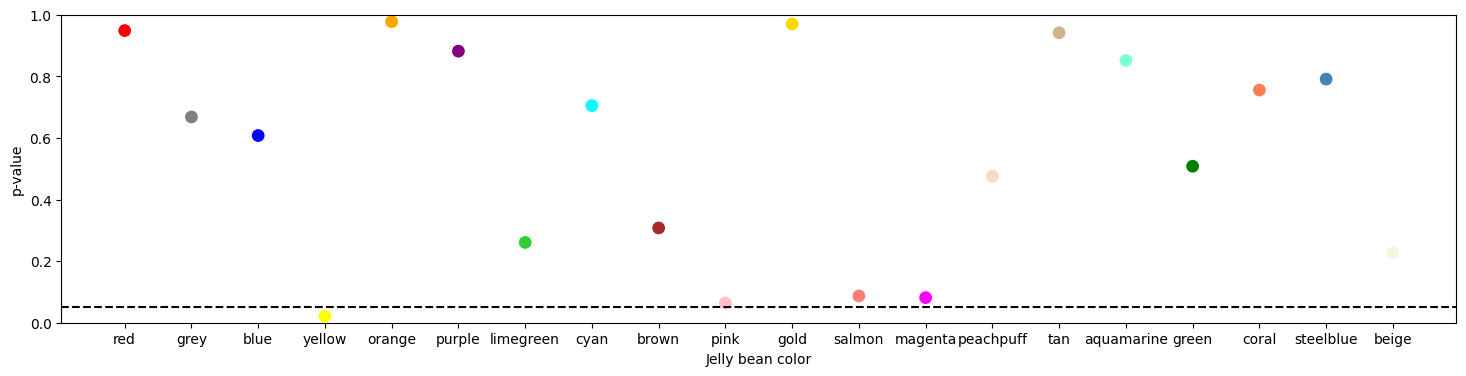

In [10]:
# Create t-test data
ttest_data = pd.DataFrame({'color': colors, 'pval': [test_color(data, color) for color in colors]})

# Set the plot size
plt.figure(figsize=(18, 4))

# Scatter plot with colors
sns.scatterplot(x='color', y='pval', hue='color', data=ttest_data, palette=colors, s=100)

# Add dashed line at y = 0.05
plt.axhline(y=0.05, linestyle='--', color='black')

# Set y-axis limits
plt.ylim(0, 1)

# Set axis labels
plt.xlabel('Jelly bean color')
plt.ylabel('p-value')

# Hide the legend
plt.legend().set_visible(False)

# Show the plot
plt.show()

You discover that yellow jelly bean color has significant p-value.

In [11]:
p_value_yellow = test_color(data, 'yellow')
print(f"P-value for 'yellow': {p_value_yellow}")

P-value for 'yellow': 0.020860204688484103


You finally publish your breaking news!

## Explanation

Now let's figure out what is going on here. So far it looks quite counterintuitive: it seems that the way we generated the data should make the acne condition completely independent of eating jelly beans of any color.

Actually, it is not the data that causes the problem, it is the testing procedure!

It turns out that even if there is no effect of eating jelly beans on acne the probability to observe a significant result is equal to  0.05
 . This can be explained by the fact that p-value is uniformly distributed under the null; thus, observing p-value less than 0.05 has exactly  5%
  chance.

It is not hard to derive the formal proof of this fact, however, one can check this statement via simulation as well. To do so, we

generate jelly beans data  10000
  times;
run t-test for each data testing the null "there is no effect of eating jelly beans on acne condition";
check the distribution of p-values. Note that the way we generate the data guarantees the real data distribution to follow the hypothesis.

In [12]:
from scipy.stats import ttest_ind

# Function to generate data
def generate_data(people, p_eat_jelly_bean):
    acne_condition = np.random.rand(people)
    eating = np.random.choice(['eating', 'not eating'], people, replace=True, p=[p_eat_jelly_bean, 1 - p_eat_jelly_bean])
    data = pd.DataFrame({'acne_condition': acne_condition, 'eating': eating})
    return data

# Number of people and probability
people = 500
p_eat_jelly_bean = 0.9

# Number of trials
trial = 10000

# Function to compute p-values for 10000 random data sets
def compute_pvalues(trial):
    pvals = np.zeros(trial)
    for i in range(trial):
        data = generate_data(people, p_eat_jelly_bean)
        pvals[i] = ttest_ind(data[data['eating'] == 'eating']['acne_condition'],
                              data[data['eating'] == 'not eating']['acne_condition']).pvalue
    return pvals

# Run the function
pvals = compute_pvalues(trial)


The histogram demonstrates that p-value follows the uniform distribution. Thus, we conclude that there is  5%
  chance to observe significant p-value even if the null is true.

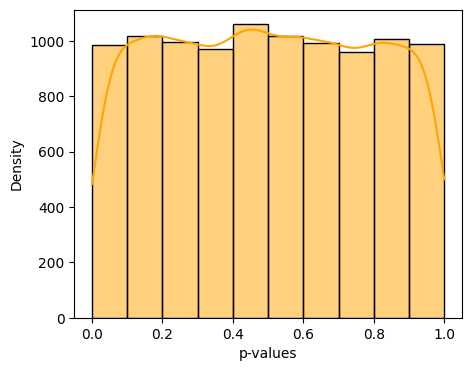

In [13]:
# Set the plot size
plt.figure(figsize=(5, 4))

# Plot histogram using seaborn
sns.histplot(pvals, bins=np.arange(0, 1.1, 0.1), kde=True, color='orange', alpha=0.5)

# Set axis labels
plt.xlabel('p-values')
plt.ylabel('Density')

# Show the plot
plt.show()

Next, if there is  5%
  to observe a significant result under the null, then testing  20
  hypotheses will result in

\begin{equation} 1 - 0.95^{20} \approx 64\%\end{equation}

chance to observe at least one significant test among these  20
 . In other words, running many tests on the same data increased the probability to observe some significant result form  5%
  to  64%
 ! This explaines why checking 20 different jelly bean colors revealed one color that is "associated" with acne.

## Conclusion
Looking for patterns in data is legitimate. However, you should be very careful when interpreting the results. As we showed above, running multiple tests and presenting only the significant ones without the appropriate context can be very misleading.

There are some remedies for data snooping:

- clearly state the testing proceedure and share the details about the number of tests you conducted;
- conduct randomized out-of-sample tests or use cross-validation to validate your hypothesis;
- record the number of all significance tests conducted during the study and apply some correction (e.g. Bonferroni correction; the less conservative way would be to use Benjamini and Hochberg's false discovery rate).